In [37]:
import os, sys, time, glob
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp
sns.set_style("ticks")
sns.set_context(context="talk")

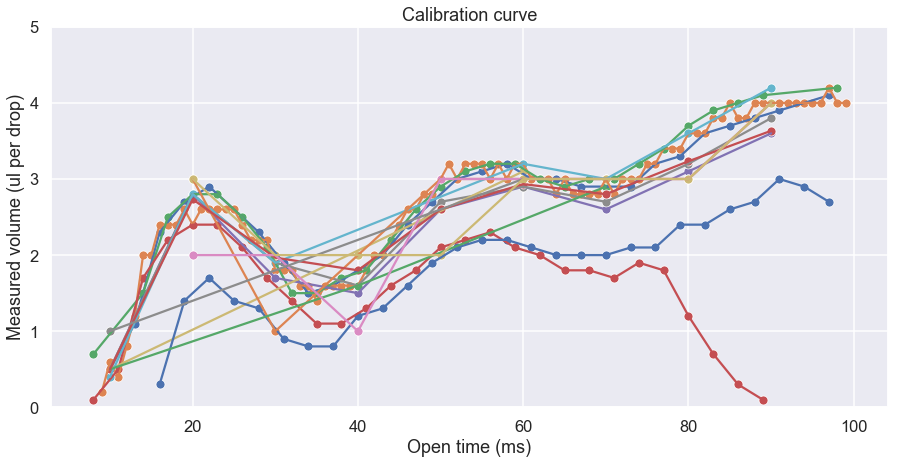

In [118]:
## READ IN CALIBRATION CURVE FILES FROM CSHL
calibration_path = os.path.join('/Users/urai/Data', 'calibrations_water')
csvfiles = glob.glob(os.path.join(calibration_path, '*_calibration_function.csv'))

# OUTPUT OVERVIEW FIGURE
sns.set()
sns.set_context(context="talk")
f, ax = plt.subplots(1,1, figsize=(15, 7))

for i, filename in enumerate(csvfiles):
    
    # READ IN
    df1 = pd.read_csv(os.path.join(calibration_path, filename), index_col=None)
    df1 = df1[df1.weight_perdrop < 10]
    df1 = df1[df1.weight_perdrop > 0]

    # FIT EXTRAPOLATION FUNCTION
    #time2vol = sp.interpolate.pchip(df1["open_time"], df1["weight_perdrop"]) # for later
    #xp 	= np.linspace(df1["open_time"].min(), df1["open_time"].max(), 100)
    #ax.plot(xp, time2vol(xp), '-')

    # CALIBRATION CURVE
    sns.lineplot(x="open_time", y="weight_perdrop", data=df1, ax=ax)
    sns.scatterplot(x="open_time", y="weight_perdrop", data=df1, ax=ax)

ax.set(xlabel="Open time (ms)", ylabel="Measured volume (ul per drop)", title="Calibration curve", ylim=[0, 5])
plt.draw()
f.savefig(os.path.join(calibration_path, 'summary_curve.pdf'))
